In [53]:
import numpy as np
import pandas as pd 
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
from tqdm import tqdm, tqdm_notebook
import cv2
import matplotlib.pyplot as plt
from keras import layers, models
from keras import optimizers

from sklearn.utils import shuffle


# change directories according to computer using on
train_dir = "/Users/jonathantahod/Desktop/All/Aerial_Cactus_Identification/train"
test_dir = "/Users/jonathantahod/Desktop/All/Aerial_Cactus_Identification/test"
train_df = pd.read_csv('/Users/jonathantahod/Desktop/All/Aerial_Cactus_Identification/train.csv')

In [54]:
train_df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


Image shape = (32, 32, 3)


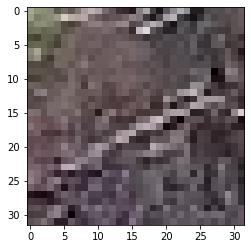

In [55]:
image = plt.imread(os.path.join(train_dir, os.listdir(train_dir)[0]))
print("Image shape =", image.shape)
plt.imshow(image)
plt.show()

In [56]:
# Setup training data

# X_train = []
# Y_tr = []
# imges = train_df['id'].values
# for img_id in tqdm_notebook(imges):
#     X_train.append(cv2.imread(train_dir + img_id))    
#     Y_tr.append(train_df[train_df['id'] == img_id]['has_cactus'].values[0])  
# X_train = np.asarray(X_train)
# X_train = X_train.astype('float32')
# X_train /= 255
# Y_tr = np.asarray(Y_tr)



print("Prepping Data...")
image_directory = '/Users/jonathantahod/Desktop/All/Aerial_Cactus_Identification/train'

#Loading images and labels
X_train = [cv2.imread(image_directory + filename) for filename in os.listdir(image_directory)]
y_train = [train_df[train_df['id'] == filename].has_cactus.values for filename in os.listdir(image_directory)]

X_train = np.array(X_train)
y_train = np.array(y_train)
y_train = y_train.flatten()

# NEEED TO FIX, X_TRAIN SHAPE SHOULD BE (17500,32,32,3).. BUT WHY. ?!
print("Complete!")
print("X_train shape = {}".format(X_train.shape))
print("y_train shape = {}".format(y_train.shape))



Prepping Data...
Complete!
X_train shape = (17498,)
y_train shape = (17498,)


In [51]:
def cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(2,2),activation='relu',input_shape=(32,32,3)))
    model.add(layers.MaxPool2D((2,2)))
    model.add(Dropout(0.2))
    model.add(layers.Conv2D(64,(2,2),activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(Dropout(0.2))
    model.add(layers.Conv2D(64,(2,2),activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(layers.Dense(1,activation='sigmoid'))
    return model

In [52]:
model = cnn_model()
model.compile(loss='binary_crossentropy',optimizer=optimizers.rmsprop(),metrics=['acc'])


ValueError: Error when checking input: expected conv2d_21_input to have 4 dimensions, but got array with shape (17498, 1)